In [1]:
#directory "_build"
#load "matrix.cmo"
#require "jupyter-archimedes"
#use "matrix.ml"
#use "perceptron.ml"

/home/austinw/.opam/cs3110-2021sp/lib/ocaml/unix.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ocaml/bigarray.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/cairo2: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/cairo2/cairo.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ocaml/dynlink.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ocaml/camlp4: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/archimedes: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/archimedes/archimedes_internals.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/archimedes/archimedes_toploop.cma: loaded


Cannot find file graphics.cma.
Cannot find file archimedes_graphics.cma.


Module Archimedes loaded and aliased as A.
/home/austinw/.opam/cs3110-2021sp/lib/archimedes/archimedes_cairo.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/bytes: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/base64: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/base64/base64.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ocaml/compiler-libs: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/ocaml/compiler-libs/ocamlcommon.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/result: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/result/result.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ppx_deriving/runtime: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/ppx_deriving/runtime/ppx_deriving_runtime.cma: loaded
/home/austinw/.opam/cs3110-2021sp/lib/ppx_deriving_yojson/runtime: added to search path
/home/austinw/.opam/cs3110-2021sp/lib/ppx_deriving_yojson/runtime/ppx_deriving_yojson_runtime.cma: loaded
/home/austinw/.opam/cs

type t = { dimensions : int * int; matrix : float list list; }
exception InvalidDimensions of string
val dim : t -> int * int = <fun>
val matrix : t -> float list list = <fun>
val fill : int -> int -> float -> t = <fun>
val zero : int -> int -> t = <fun>
val eye : int -> t = <fun>
val transpose : t -> t = <fun>
val mult : t -> t -> t = <fun>
val to_array : 'a list list -> 'a array array = <fun>
val to_list : 'a array array -> 'a list list = <fun>
val swap : 'a array -> int -> int -> unit = <fun>
val rref : t -> t = <fun>
val construct : float list list -> t = <fun>
val lu_decomp : t -> t * t = <fun>
val concat : t -> t -> t = <fun>
val invert : t -> t = <fun>
val scale : t -> float -> t = <fun>
val det : t -> float = <fun>
val magnitude : t -> float = <fun>
val normalize : t -> t = <fun>
val eigen : t -> bool -> float * t = <fun>
val elem_pow : t -> float -> t = <fun>
val pinv : t -> t = <fun>
val op : t -> t -> (float -> float -> float) -> t = <fun>
val dot : t -> t -> float = <fun>
v

In [2]:
(*Generate points*)
let rec gen_x acc n = if n = 0 then acc else gen_x ((1.0 -. Random.float 2.0) :: acc) (n-1) 
let x = gen_x [] 5000
let y = gen_x [] 5000
let f x y = if y > 0.8 *. x +. 0.4 then 1.0 else 0.0
let rec gen_pp x_acc y_acc u_acc l_acc = 
    match x_acc with 
    | [] -> (u_acc, l_acc)
    | x :: xs -> 
        match y_acc with 
            | [] -> assert false
            | y :: ys -> if f x y = 1.0 then gen_pp xs ys (u_acc @ [(x, y)]) l_acc 
                         else gen_pp xs ys u_acc (l_acc @ [(x, y)])
let pp = gen_pp x y [] []
let u_pp = fst pp 
let l_pp = snd pp
let rec gen_labels x_acc y_acc l_acc = 
    match x_acc with 
    | [] -> l_acc
    | x :: xs -> 
        match y_acc with 
            | [] -> assert false
            | y :: ys -> gen_labels xs ys (l_acc @ [f x y])
let labels = [gen_labels x y []] |> construct |> transpose 
let x = [x] |> construct |> transpose 
let y = [y] |> construct |> transpose 
let data = concat x y 
let w = train data 0.001 labels 100 |> matrix 
let f' x = let [w0 :: w1 :: [w2]] = w in (-1.) *. (w1 *. x +. w0) /. w2

val gen_x : float list -> int -> float list = <fun>


val x : float list =
  [0.157291784475039664; 0.698096135486109493; -0.508051387964093104;
   0.970950708036462884; -0.936371195859688088; -0.125483768931767159;
   -0.370296984708343491; 0.52313530270716313; 0.763867198223799782;
   0.798528251534663669; -0.142979880805123916; 0.367129636264342474;
   0.391613224785123282; -0.583443889254687598; 0.751140052519159;
   0.444659459028777237; -0.225309506535604331; 0.928359301770344869;
   0.546106029634509493; -0.0236870026185140858; -0.487677194220341725;
   -0.685755477757626908; 0.654158631583389827; -0.0453449996819610401;
   -0.938091483811426; 0.385331024929554178; 0.865539995230231618;
   0.767227434144242881; -0.212246497897267572; 0.915846977831509;
   -0.544403000163105943; 0.284850166607950706; 0.704234332702931232;
   -0.249434769027709224; -0.436595466675756327; 0.172926484077847942;
   -0.347316106124710755; 0.933029567175890473; -0.87653640458018578;
   0.519704201101077734; 0.495546763955038383; -0.765829271385960242;
   

val y : float list =
  [-0.860752688225834728; 0.49551169887929547; 0.982204201030122848;
   -0.947637484523602858; 0.121220497201742328; -0.20348648905986555;
   -0.793243840481926; 0.841708642692905; -0.216204812321425743;
   0.539296535203082295; -0.112620662122193016; 0.707202339078302;
   0.977599631321800944; 0.777315673010575; -0.897144249362527457;
   -0.597001309615823539; 0.856116888754745453; 0.402008007563799508;
   0.630516349358299; -0.485704918457295909; -0.211810306568167794;
   -0.576695288354731828; 0.621284033549967; -0.438570852366386044;
   0.600228726713134542; -0.576210898463325183; -0.83146935683733636;
   0.2799961913903527; -0.324628042237100845; 0.965985472014215141;
   -0.275969541603176438; -0.637440126211076485; -0.0166040568491283569;
   0.654199154132019678; -0.777112342011472279; -0.279785009327425227;
   -0.139814034382684138; -0.0379513241238249588; -0.335701978283160507;
   -0.780993786900239684; -0.398173885447411502; -0.403823026060302404;
   -0.42

val f : float -> float -> float = <fun>


val gen_pp :
  float list ->
  float list ->
  (float * float) list ->
  (float * float) list -> (float * float) list * (float * float) list = <fun>


val pp : (float * float) list * (float * float) list =
  ([(-0.508051387964093104, 0.982204201030122848);
    (-0.936371195859688088, 0.121220497201742328);
    (0.52313530270716313, 0.841708642692905);
    (0.367129636264342474, 0.707202339078302);
    (0.391613224785123282, 0.977599631321800944);
    (-0.583443889254687598, 0.777315673010575);
    (-0.225309506535604331, 0.856116888754745453);
    (-0.938091483811426, 0.600228726713134542);
    (-0.249434769027709224, 0.654199154132019678);
    (0.259691316085809, 0.649960782950319782);
    (-0.861770532269975575, -0.258279218297825741);
    (-0.573510178451094754, 0.101456830536010401);
    (-0.970052613296018107, 0.981651689812652384);
    (0.123212801629622448, 0.693969027769394842);
    (-0.464010117963569391, 0.902797710440538248);
    (0.581417243948354256, 0.984695823482463539);
    (-0.989177566262350538, 0.140789445709625705);
    (0.28441823847602965, 0.683136584938699221);
    (-0.639105654684027691, 0.876279388387819713);

val u_pp : (float * float) list =
  [(-0.508051387964093104, 0.982204201030122848);
   (-0.936371195859688088, 0.121220497201742328);
   (0.52313530270716313, 0.841708642692905);
   (0.367129636264342474, 0.707202339078302);
   (0.391613224785123282, 0.977599631321800944);
   (-0.583443889254687598, 0.777315673010575);
   (-0.225309506535604331, 0.856116888754745453);
   (-0.938091483811426, 0.600228726713134542);
   (-0.249434769027709224, 0.654199154132019678);
   (0.259691316085809, 0.649960782950319782);
   (-0.861770532269975575, -0.258279218297825741);
   (-0.573510178451094754, 0.101456830536010401);
   (-0.970052613296018107, 0.981651689812652384);
   (0.123212801629622448, 0.693969027769394842);
   (-0.464010117963569391, 0.902797710440538248);
   (0.581417243948354256, 0.984695823482463539);
   (-0.989177566262350538, 0.140789445709625705);
   (0.28441823847602965, 0.683136584938699221);
   (-0.639105654684027691, 0.876279388387819713);
   (-0.725004352415757447, 0.1408005789

val l_pp : (float * float) list =
  [(0.157291784475039664, -0.860752688225834728);
   (0.698096135486109493, 0.49551169887929547);
   (0.970950708036462884, -0.947637484523602858);
   (-0.125483768931767159, -0.20348648905986555);
   (-0.370296984708343491, -0.793243840481926);
   (0.763867198223799782, -0.216204812321425743);
   (0.798528251534663669, 0.539296535203082295);
   (-0.142979880805123916, -0.112620662122193016);
   (0.751140052519159, -0.897144249362527457);
   (0.444659459028777237, -0.597001309615823539);
   (0.928359301770344869, 0.402008007563799508);
   (0.546106029634509493, 0.630516349358299);
   (-0.0236870026185140858, -0.485704918457295909);
   (-0.487677194220341725, -0.211810306568167794);
   (-0.685755477757626908, -0.576695288354731828);
   (0.654158631583389827, 0.621284033549967);
   (-0.0453449996819610401, -0.438570852366386044);
   (0.385331024929554178, -0.576210898463325183);
   (0.865539995230231618, -0.83146935683733636);
   (0.767227434144242881, 0

val gen_labels : float list -> float list -> float list -> float list = <fun>


val labels : Matrix.t =
  {dimensions = (5000, 1);
   matrix =
    [[0.]; [0.]; [1.]; [0.]; [1.]; [0.]; [0.]; [1.]; [0.]; [0.]; [0.]; 
     [1.]; [1.]; [1.]; [0.]; [0.]; [1.]; [0.]; [0.]; [0.]; [0.]; [0.]; 
     [0.]; [0.]; [1.]; [0.]; [0.]; [0.]; [0.]; [0.]; [0.]; [0.]; [0.]; 
     [1.]; [0.]; [0.]; [0.]; [0.]; [0.]; [0.]; [0.]; [0.]; [0.]; [0.]; 
     [0.]; [1.]; [0.]; [0.]; [0.]; [0.]; [1.]; [0.]; [0.]; [0.]; [0.]; 
     [0.]; [1.]; [0.]; [0.]; [1.]; [0.]; [0.]; [1.]; [0.]; [0.]; [0.]; 
     [1.]; [1.]; [0.]; [0.]; [1.]; [1.]; [0.]; [0.]; [0.]; [0.]; [0.]; 
     [1.]; [1.]; [0.]; [0.]; [0.]; [0.]; [1.]; [0.]; [0.]; [1.]; [1.]; 
     [0.]; [0.]; [0.]; [0.]; [0.]; [1.]; [0.]; [0.]; [0.]; [0.]; [0.]; 
     [0.]; [0.]; [0.]; [1.]; [1.]; [0.]; [0.]; [0.]; [0.]; [1.]; [0.]; 
     [0.]; [1.]; [0.]; [0.]; [0.]; [0.]; [0.]; [1.]; [0.]; [0.]; [0.]; 
     [0.]; [0.]; [0.]; [1.]; [0.]; [0.]; [1.]; [0.]; [1.]; [0.]; [1.]; 
     [0.]; [0.]; [0.]; [0.]; [0.]; [0.]; [0.]; [0.]; [1.]; [0.]; [0.]; 
 

val x : Matrix.t =
  {dimensions = (5000, 1);
   matrix =
    [[0.157291784475039664]; [0.698096135486109493]; [-0.508051387964093104];
     [0.970950708036462884]; [-0.936371195859688088];
     [-0.125483768931767159]; [-0.370296984708343491]; [0.52313530270716313];
     [0.763867198223799782]; [0.798528251534663669]; [-0.142979880805123916];
     [0.367129636264342474]; [0.391613224785123282]; [-0.583443889254687598];
     [0.751140052519159]; [0.444659459028777237]; [-0.225309506535604331];
     [0.928359301770344869]; [0.546106029634509493];
     [-0.0236870026185140858]; [-0.487677194220341725];
     [-0.685755477757626908]; [0.654158631583389827];
     [-0.0453449996819610401]; [-0.938091483811426]; [0.385331024929554178];
     [0.865539995230231618]; [0.767227434144242881]; [-0.212246497897267572];
     [0.915846977831509]; [-0.544403000163105943]; [0.284850166607950706];
     [0.704234332702931232]; [-0.249434769027709224];
     [-0.436595466675756327]; [0.172926484077847942];


val y : Matrix.t =
  {dimensions = (5000, 1);
   matrix =
    [[-0.860752688225834728]; [0.49551169887929547]; [0.982204201030122848];
     [-0.947637484523602858]; [0.121220497201742328]; [-0.20348648905986555];
     [-0.793243840481926]; [0.841708642692905]; [-0.216204812321425743];
     [0.539296535203082295]; [-0.112620662122193016]; [0.707202339078302];
     [0.977599631321800944]; [0.777315673010575]; [-0.897144249362527457];
     [-0.597001309615823539]; [0.856116888754745453]; [0.402008007563799508];
     [0.630516349358299]; [-0.485704918457295909]; [-0.211810306568167794];
     [-0.576695288354731828]; [0.621284033549967]; [-0.438570852366386044];
     [0.600228726713134542]; [-0.576210898463325183]; [-0.83146935683733636];
     [0.2799961913903527]; [-0.324628042237100845]; [0.965985472014215141];
     [-0.275969541603176438]; [-0.637440126211076485];
     [-0.0166040568491283569]; [0.654199154132019678];
     [-0.777112342011472279]; [-0.279785009327425227];
     [-0.139814

val data : Matrix.t =
  {dimensions = (5000, 2);
   matrix =
    [[0.157291784475039664; -0.860752688225834728];
     [0.698096135486109493; 0.49551169887929547];
     [-0.508051387964093104; 0.982204201030122848];
     [0.970950708036462884; -0.947637484523602858];
     [-0.936371195859688088; 0.121220497201742328];
     [-0.125483768931767159; -0.20348648905986555];
     [-0.370296984708343491; -0.793243840481926];
     [0.52313530270716313; 0.841708642692905];
     [0.763867198223799782; -0.216204812321425743];
     [0.798528251534663669; 0.539296535203082295];
     [-0.142979880805123916; -0.112620662122193016];
     [0.367129636264342474; 0.707202339078302];
     [0.391613224785123282; 0.977599631321800944];
     [-0.583443889254687598; 0.777315673010575];
     [0.751140052519159; -0.897144249362527457];
     [0.444659459028777237; -0.597001309615823539];
     [-0.225309506535604331; 0.856116888754745453];
     [0.928359301770344869; 0.402008007563799508];
     [0.5461060296345094

val w : float list list =
  [[-0.713514761177295287; -1.43068162356608863; 1.78525439389516904]]


File "[2]", line 29, characters 11-71:
29 | let f' x = let [w0 :: w1 :: [w2]] = w in (-1.) *. (w1 *. x +. w0) /. w2
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Warning 8: this pattern-matching is not exhaustive.
Here is an example of a case that is not matched:
((_::_::_::[])::_::_|(_::_::_::_::_)::_|(_::_::[])::_|(_::[])::_|[]::_|[])


val f' : float -> float = <fun>


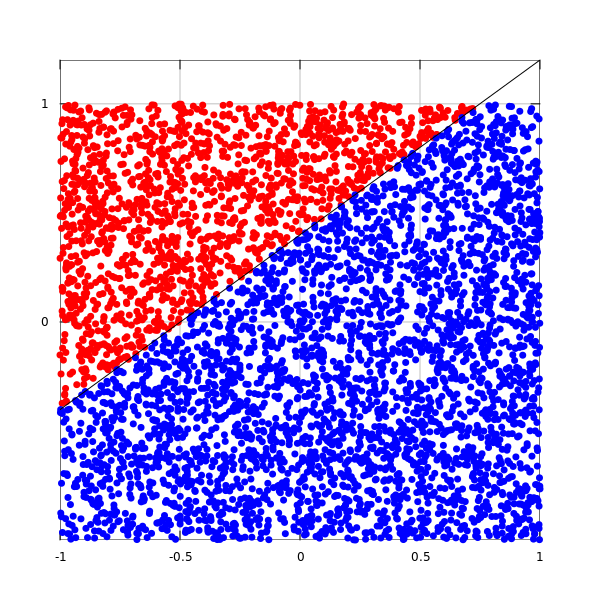

- : unit = ()


In [3]:
(* Plot using Archimedes *)
let vp = A. init ~w:600. ~h:600. ["jupyter"] in
    A.Axes.box vp ;
    A.set_color vp A.Color.red ;
    A.List.xy_pairs vp u_pp ;
    A.set_color vp A.Color.blue ;
    A.List.xy_pairs vp l_pp ;
    A.set_color vp A.Color.black ;
    A.fx vp f' (-1.0) 1.0 ;
    A.close vp 